# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [135]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
from api_keys import g_key
import numpy as np
import matplotlib.pyplot as plt

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [136]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

617

In [137]:
#Perform API Calls

#Perform a weather check on each city using a series of successive API calls.
#Include a print log of each city as it'sbeing processed (with the city number and city name).

In [138]:
# Get Weather Data
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

weather_response = requests.get(query_url + city)
weather_json = weather_response.json()
print(json.dumps(weather_json, indent=4))

{
    "coord": {
        "lon": 147.06,
        "lat": -42.78
    },
    "weather": [
        {
            "id": 801,
            "main": "Clouds",
            "description": "few clouds",
            "icon": "02d"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 67.05,
        "feels_like": 58.59,
        "temp_min": 62.6,
        "temp_max": 72,
        "pressure": 1005,
        "humidity": 63
    },
    "visibility": 10000,
    "wind": {
        "speed": 17.22,
        "deg": 150
    },
    "clouds": {
        "all": 20
    },
    "dt": 1579577872,
    "sys": {
        "type": 1,
        "id": 9545,
        "country": "AU",
        "sunrise": 1579546693,
        "sunset": 1579600016
    },
    "timezone": 39600,
    "id": 2155415,
    "name": "New Norfolk",
    "cod": 200
}


In [139]:
# Set Up Lists to Hold Reponse Info
city_name = []
country = []
date = []
latitude = []
longitude = []
max_temperature = []
humidity = []
cloudiness = []
wind_speed = []
city_id = []


# Print Starting Log Statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

# Loop Through List of Cities & Perform a Request for Data on Each
for city in cities:
    response = requests.get(query_url + city).json()
    
# Exception Handling
    try:
        city_name.append(response["name"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        latitude.append(response["coord"]["lat"])
        longitude.append(response["coord"]["lon"])
        max_temperature.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        city_id = response["id"]
        print(f"Processing City {city_id} | {city_record}")
        
        
    except:
        print("City not found. Skipping...") 
    continue

# Print Ending Log Statement
print(f"-------------------------------")
print(f"Data Retrieval Complete")
print(f"-------------------------------")


Beginning Data Retrieval
-------------------------------
Processing City 4030556 | Rikitea
Processing City 2126123 | Chokurdakh
Processing City 932987 | Tsabong
Processing City 1507390 | Dikson
Processing City 2253354 | Dakar
Processing City 6089245 | Norman Wells
Processing City 935215 | Saint-Philippe
Processing City 2630299 | Hofn
Processing City 2110227 | Butaritari
Processing City 2450173 | Taoudenni
Processing City 1540711 | Muravlenko
Processing City 3369157 | Cape Town
Processing City 1106677 | Bambous Virieux
City not found. Skipping...
City not found. Skipping...
Processing City 5122534 | Jamestown
Processing City 2075265 | Busselton
Processing City 6170031 | Tuktoyaktuk
Processing City 3366880 | Hermanus
Processing City 5855927 | Hilo
Processing City 3466704 | Castro
Processing City 5106841 | Albany
Processing City 2163355 | Hobart
Processing City 3838793 | Rio Tercero
Processing City 2138555 | Poum
Processing City 5972291 | Havre-Saint-Pierre
Processing City 3870243 | Talta

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [140]:
# create a data frame from cities, lat, and temp
weather_dict = {
    "Country": country,
    "City": city_name,
    "Date": date,
    "Latitude": latitude,
    "Longitude": longitude,
    "Max Temperature": max_temperature,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed
}
weather_data = pd.DataFrame(weather_dict)
weather_data

,Country,City,Date,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed
0,PF,Rikitea,1579577872,-23.12,-134.97,78.30,78,100,10.09
1,RU,Chokurdakh,1579577873,70.63,147.92,-17.23,98,100,8.03
2,BW,Tsabong,1579577873,-26.02,22.40,77.47,50,0,9.48
3,RU,Dikson,1579577873,73.51,80.55,-20.63,89,92,22.84
4,SN,Dakar,1579577873,14.69,-17.44,77.00,73,0,6.93
...,...,...,...,...,...,...,...,...,...
567,CA,Sioux Lookout,1579578014,50.10,-91.92,6.80,84,5,12.75
568,AO,Lumeje,1579578014,-11.55,20.78,66.65,93,100,5.39
569,CA,Valleyview,1579578015,55.07,-117.29,39.02,64,67,14.65
570,ES,Arrecife,1579577805,28.96,-13.55,60.80,76,75,8.05


In [141]:
weather_data.to_csv("./weather_data.csv")

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

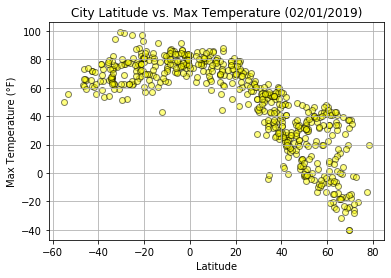

In [142]:
# Build Scatter Plot for Each Data Type
plt.scatter(weather_data["Latitude"], weather_data["Max Temperature"], facecolors="yellow", marker="o", alpha=0.5, edgecolor="black")

# Incorporate Other Graph Properties
plt.title("City Latitude vs. Max Temperature (02/01/2019)")
plt.ylabel("Max Temperature (°F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save Figure
plt.savefig("./City_Latitude_vs_Max_Temperature.png")

# Show Plot
plt.show()

Analysis: there is a strong negative connection between the City latitude and max temperature. 

#### Latitude vs. Humidity Plot

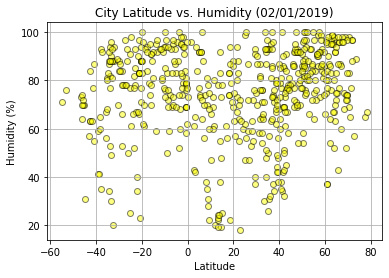

In [143]:
# Build Scatter Plot for Each Data Type
plt.scatter(weather_data["Latitude"], weather_data["Humidity"], facecolors="yellow", marker="o", edgecolor="black",alpha=0.5)
# Incorporate Other Graph Properties
plt.title("City Latitude vs. Humidity (02/01/2019)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save Figure
plt.savefig("./City_Latitude_vs_Humidity.png")

# Show Plot
plt.show()

#### Latitude vs. Cloudiness Plot

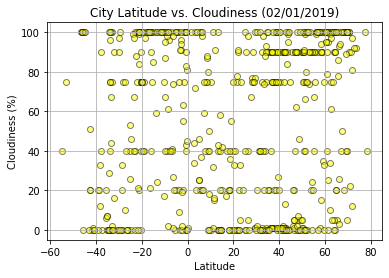

In [144]:
plt.scatter(weather_data["Latitude"], weather_data["Cloudiness"], facecolors="yellow", marker="o", edgecolor="black", alpha=0.5)

# Incorporate Other Graph Properties
plt.title("City Latitude vs. Cloudiness (02/01/2019)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save Figure
plt.savefig("./City_Latitude_vs_Cloudiness.png")

# Show Plot
plt.show()

Analysis: Data points show there is no strong connection between the City latitude and cloudiness

#### Latitude vs. Wind Speed Plot

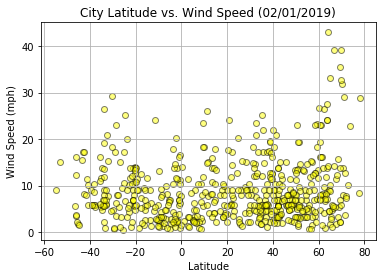

In [145]:
# Build Scatter Plot for Each Data Type
plt.scatter(weather_data["Latitude"], weather_data["Wind Speed"], facecolors="yellow", marker="o", edgecolor="black", alpha=0.5)

# Incorporate Other Graph Properties
plt.title("City Latitude vs. Wind Speed (02/01/2019)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save Figure
plt.savefig("./City_Latitude_vs_Wind_Speed.png")

# Show Plot
plt.show()

Analysis: Data points on this scatter plot show there is no relationship between the City latiude and the speed of the wind.

## Linear Regression

R squard: -0.779223796886898


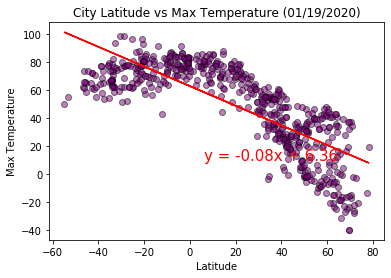

In [158]:
# OPTIONAL: Create a function to create Linear Regression plots
## Convert to floats and store Latitude and Max Temperature as x and y values

x_values = weather_data['Latitude'].astype('float')
y_values = weather_data['Max Temperature'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Plot scatter plot
plt.scatter(x_values,y_values,facecolors="purple", marker="o", edgecolor="black", alpha=0.5)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.title('City Latitude vs Max Temperature (01/19/2020)')

# Print r square value
print(f"R squard: {rvalue}")

# Show plot
plt.show()

In [147]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere = weather_data.loc[(weather_data['Latitude'] > 0)]
northern_hemisphere

,Country,City,Date,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed
1,RU,Chokurdakh,1579577873,70.63,147.92,-17.23,98,100,8.03
3,RU,Dikson,1579577873,73.51,80.55,-20.63,89,92,22.84
4,SN,Dakar,1579577873,14.69,-17.44,77.00,73,0,6.93
5,CA,Norman Wells,1579577873,65.28,-126.83,-18.40,75,5,3.36
7,IS,Hofn,1579577874,64.25,-15.21,40.59,63,100,42.93
...,...,...,...,...,...,...,...,...,...
566,TR,Van,1579578014,38.49,43.38,28.40,79,75,9.17
567,CA,Sioux Lookout,1579578014,50.10,-91.92,6.80,84,5,12.75
569,CA,Valleyview,1579578015,55.07,-117.29,39.02,64,67,14.65
570,ES,Arrecife,1579577805,28.96,-13.55,60.80,76,75,8.05


In [148]:
southern_hemisphere = weather_data.loc[(weather_data['Latitude'] <= 0)]
southern_hemisphere

,Country,City,Date,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed
0,PF,Rikitea,1579577872,-23.12,-134.97,78.30,78,100,10.09
2,BW,Tsabong,1579577873,-26.02,22.40,77.47,50,0,9.48
6,RE,Saint-Philippe,1579577874,-21.36,55.77,77.00,83,100,6.93
11,ZA,Cape Town,1579577875,-33.93,18.42,66.99,82,0,2.24
12,MU,Bambous Virieux,1579577875,-20.34,57.76,81.00,88,75,10.71
...,...,...,...,...,...,...,...,...,...
557,ID,Luwuk,1579578012,-0.95,122.79,83.79,69,100,6.91
558,CO,Puerto Narino,1579578012,-3.77,-70.38,75.20,100,75,2.24
562,PY,Pozo Colorado,1579578013,-23.49,-58.80,87.55,52,97,5.30
564,PG,Namatanai,1579578013,-3.67,152.43,84.51,74,9,17.87


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

R squard: -0.8266544953557846


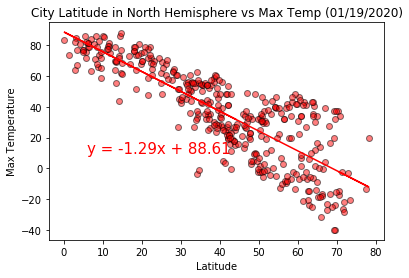

In [149]:
x_values = northern_hemisphere['Latitude'].astype('float')
y_values = northern_hemisphere['Max Temperature'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values, facecolors="red", marker="o", edgecolor="black", alpha=0.5)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.title('City Latitude in North Hemisphere vs Max Temp (01/19/2020)')

# Print r square value
print(f"R squard: {rvalue}")

# Show plot
plt.show()

Analysis: the following plot shows us that there is a strong negative correlation between the max temperature and city latitude (northern hemisphere). Meaning: the higher the latitude the lower the temperature.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

R squard: 0.4400184426761617


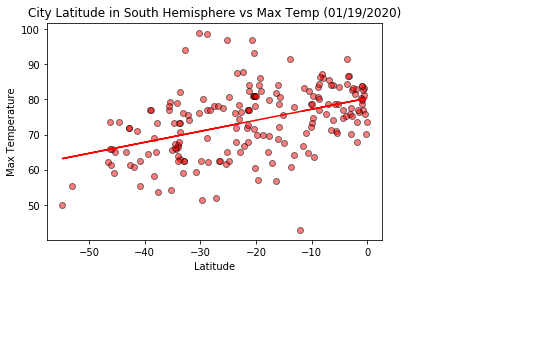

In [150]:
x_values = southern_hemisphere['Latitude'].astype('float')
y_values = southern_hemisphere['Max Temperature'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values, facecolors="red", marker="o", edgecolor="black", alpha=0.5)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.title('City Latitude in South Hemisphere vs Max Temp (01/19/2020)')

# Print r square value
print(f"R squard: {rvalue}")

# Show plot
plt.show()

Analysis: the plot above tells us there is a moderate connection between the max temperature and city latitude (southern hemipshere). The closer the city to the equator the higher the temperature. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R squard: 0.34710927457981117


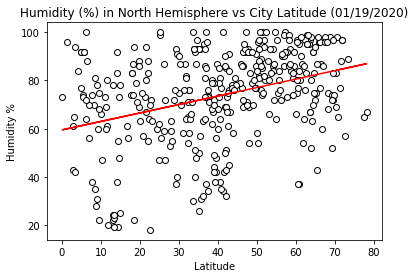

In [151]:
x_values = northern_hemisphere['Latitude'].astype('float')
y_values = northern_hemisphere['Humidity'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values, facecolors="white", marker="o", edgecolor="black")

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.title('Humidity (%) in North Hemisphere vs City Latitude (01/19/2020)')

# Print r square value
print(f"R squard: {rvalue}")

# Show plot
plt.show()

Analysis: the linear regression tells us there is a weak positive connection between the city latitude (Northern hemispehere)and Humidity %.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R squard: 0.2663055990092364


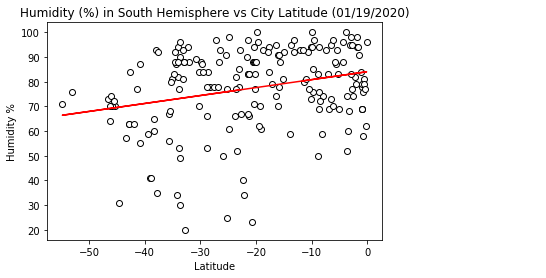

In [152]:
x_values = southern_hemisphere['Latitude'].astype('float')
y_values = southern_hemisphere['Humidity'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values,facecolors="white", marker="o", edgecolor="black")

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.title('Humidity (%) in South Hemisphere vs City Latitude (01/19/2020)')

# Print r square value
print(f"R squard: {rvalue}")

# Show plot
plt.show()

Analysis: the linear regression tells us there is a weak positive connection between the city latitude (Southern hemispehere)and Humidity %.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R squard: 0.2586468365841715


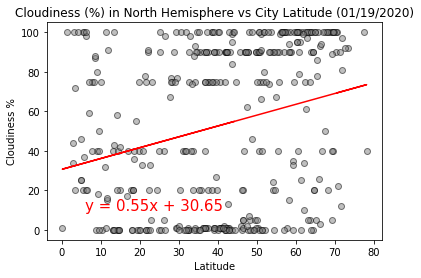

In [153]:
x_values = northern_hemisphere['Latitude'].astype('float')
y_values = northern_hemisphere['Cloudiness'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values, facecolors="grey", marker="o", edgecolor="black", alpha=0.5)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.title('Cloudiness (%) in North Hemisphere vs City Latitude (01/19/2020)')

# Print r square value
print(f"R squard: {rvalue}")

# Show plot
plt.show()

Analysis: the linear regression tells us there is a weak positive connection between the city latitude (Northern hemispehere)and Cloudiness %.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R squard: 0.21620378736141085


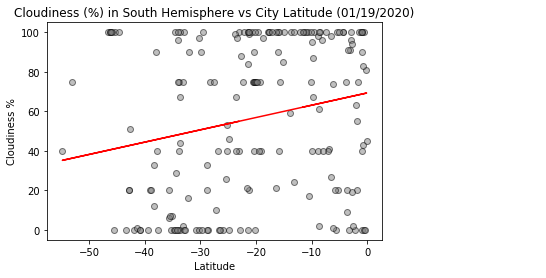

In [154]:
x_values = southern_hemisphere['Latitude'].astype('float')
y_values = southern_hemisphere['Cloudiness'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values, facecolors="grey", marker="o", edgecolor="black", alpha=0.5)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.title('Cloudiness (%) in South Hemisphere vs City Latitude (01/19/2020)')

# Print r square value
print(f"R squard: {rvalue}")

# Show plot
plt.show()

Analysis: the linear regression tells us there is almost no connection between the city latitude (Southern hemispehere)and Cloudiness %.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R squard: 0.21036350882738533


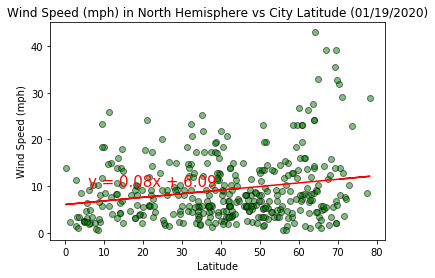

In [155]:
x_values = northern_hemisphere['Latitude'].astype('float')
y_values = northern_hemisphere['Wind Speed'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values, facecolors="green", marker="o", edgecolor="black", alpha=0.5)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Wind Speed (mph) in North Hemisphere vs City Latitude (01/19/2020)')

# Print r square value
print(f"R squard: {rvalue}")

# Show plot
plt.show()

Analysis: the linear regression tells us there is almost no connection between the city latitude (Northern hemispehere)and Wind Speed.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R squard: -0.19337247077996889


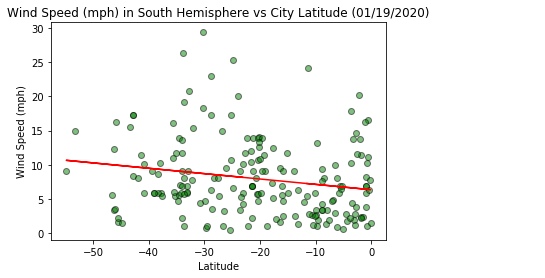

In [156]:
x_values = southern_hemisphere['Latitude'].astype('float')
y_values = southern_hemisphere['Wind Speed'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values, facecolors="green", marker="o", edgecolor="black", alpha=0.5)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Wind Speed (mph) in South Hemisphere vs City Latitude (01/19/2020)')

# Print r square value
print(f"R squard: {rvalue}")

# Show plot
plt.show()

Analysis: the linear regression tells us there almost no connection between the city latitude (Southern hemispehere)and Wind Speed.